In [ ]:
!kaggle datasets download -d jehanbhathena/weather-dataset
!unzip weather-dataset.zip

In [ ]:
!kaggle datasets download -d ammaralfaifi/5class-weather-status-image-classification
!unzip 5class-weather-status-image-classification

In [3]:
import os
import shutil

def concat_data(addedClass, mainClass):
  counter = 0
  # Use os.path.join to create the full path
  source_folder = os.path.join("/content/dataset", addedClass)  # Assuming "snow" is in "/content"
  destination_folder = os.path.join("/content/data",mainClass) # Assuming "snowy" should also be in "/content"

  # The rest of your code remains the same
  if not os.path.exists(destination_folder):
      os.makedirs(destination_folder)

  for filename in os.listdir(source_folder):
      source_path = os.path.join(source_folder, filename)
      destination_path = os.path.join(destination_folder, filename)

      if os.path.isfile(source_path):
          shutil.move(source_path, destination_path)
          # print(f"Moved: {filename}")
          counter += 1

  print(f"Total files moved: {counter}")

In [4]:
concat_data('snow', 'snowy')

Total files moved: 621


In [5]:
concat_data('fogsmog', 'foggy')

Total files moved: 851


In [6]:
concat_data('rain', 'rainy')

Total files moved: 526


In [7]:
path = '/content/data'

In [8]:
from keras.optimizers import Adam ,Adamax , SGD
from keras.applications import EfficientNetB0, EfficientNetB4
import os
from PIL import Image
from skimage.io import imread


In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from PIL import Image
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.layers import Dropout, BatchNormalization
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten,GlobalAveragePooling2D, Reshape, Input
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.utils import array_to_img
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array



In [10]:
tf.random.set_seed(42)

In [11]:
path = '/content/data'

In [12]:
os.listdir(path)

['snowy', 'cloudy', 'foggy', 'rainy', 'sunny']

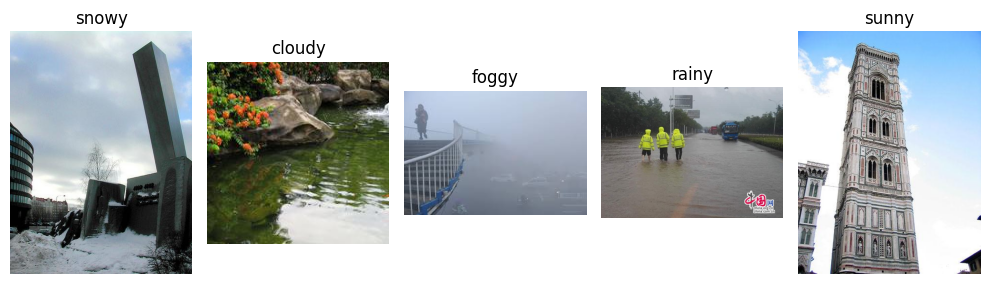

In [13]:
fig = plt.figure(figsize=(10,10))
rows = 1
columns = 5


for i, calss_folder in enumerate(os.listdir(path)):

    first_img_path = os.listdir(os.path.join(path, calss_folder))[0]
    first_image = imread(os.path.join(path, calss_folder, first_img_path))
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.imshow(first_image)
    plt.title('{}'.format(calss_folder, fontsize=10))

plt.tight_layout()
plt.show()

In [14]:
dim1 = []    # width
dim2 = []    # height
colors = []  # color channel

for i, class_folder in enumerate(os.listdir(path)):
    subfolders_path = os.path.join(path, class_folder)
    print(subfolders_path)

    for image_path in os.listdir(subfolders_path):
        file_path = os.path.join(subfolders_path, image_path)

        try:
            # Open the image to validate it
            with Image.open(file_path) as img:
                # Convert image to an array using imread
                image = imread(file_path)

                # Handle grayscale images by adding a dummy color channel
                if len(image.shape) < 3:
                    image = image.reshape(image.shape + (1,))

                d1, d2, color = image.shape
                dim1.append(d1)
                dim2.append(d2)
                colors.append(color)

        except (IOError, SyntaxError) as e:
            # Print an error message
            print(f"Removing invalid file: {file_path}. Error: {e}")
            # Remove the invalid file
            os.remove(file_path)

/content/data/snowy
Removing invalid file: /content/data/snowy/snowy weather-126.png. Error: not a PNG file
Removing invalid file: /content/data/snowy/snowy weather-45.png. Error: not a PNG file
Removing invalid file: /content/data/snowy/snowy weather-147.png. Error: not a PNG file
/content/data/cloudy
Removing invalid file: /content/data/cloudy/cloudy day-83.png. Error: not a PNG file
Removing invalid file: /content/data/cloudy/cloudy weather-122.png. Error: not a PNG file
Removing invalid file: /content/data/cloudy/cloudy day-31.png. Error: not a PNG file
Removing invalid file: /content/data/cloudy/cloudy weather-126.png. Error: not a PNG file
/content/data/foggy
Removing invalid file: /content/data/foggy/foggy weather-112.png. Error: not a PNG file
Removing invalid file: /content/data/foggy/foggy weather-87.png. Error: not a PNG file
Removing invalid file: /content/data/foggy/foggy day-68.png. Error: not a PNG file
Removing invalid file: /content/data/foggy/foggy weather-6.png. Erro

In [15]:
from PIL import Image
import os

# Define supported formats
SUPPORTED_FORMATS = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')

# Directory containing images
image_dir = "/content/data"

# Iterate through all entries in the directory
valid_images = []
for file_name in os.listdir(image_dir):
    file_path = os.path.join(image_dir, file_name)

    # Check if the entry is a file
    if os.path.isfile(file_path):
        try:
            # Attempt to open the image
            with Image.open(file_path) as img:
                # Check if the format is supported
                if file_name.lower().endswith(SUPPORTED_FORMATS):
                    valid_images.append(file_path)
                else:
                    print(f"Skipping unsupported file: {file_name}")
        except Exception as e:
            print(f"Error opening file {file_name}: {e}")
    else:
        print(f"Skipping directory: {file_name}")


Skipping directory: snowy
Skipping directory: cloudy
Skipping directory: foggy
Skipping directory: rainy
Skipping directory: sunny


In [16]:
from PIL import Image
import os

# Define supported formats
SUPPORTED_FORMATS = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')

# Directory containing images
image_dir = "/content/data"

# Iterate through all entries in the directory
for file_name in os.listdir(image_dir):
    file_path = os.path.join(image_dir, file_name)

    # Check if the entry is a file
    if os.path.isfile(file_path):
        try:
            # Open the file as an image
            with Image.open(file_path) as img:
                # Convert to RGB and save as .jpg if format is unsupported
                if not file_name.lower().endswith(SUPPORTED_FORMATS):
                    new_file_name = os.path.splitext(file_name)[0] + ".jpg"
                    new_file_path = os.path.join(image_dir, new_file_name)
                    img.convert("RGB").save(new_file_path, "JPEG")
                    print(f"Converted {file_name} to {new_file_name}")
        except Exception as e:
            print(f"Error converting file {file_name}: {e}")
    else:
        print(f"Skipping directory: {file_name}")


Skipping directory: snowy
Skipping directory: cloudy
Skipping directory: foggy
Skipping directory: rainy
Skipping directory: sunny


Text(0.5, 1.0, 'Widths vs Heights')

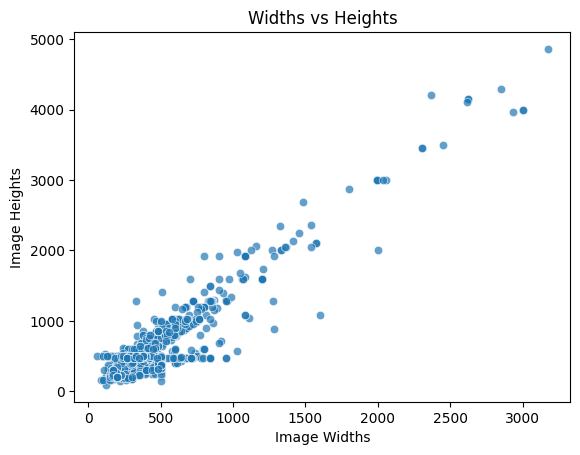

In [17]:
sns.scatterplot(x=dim1, y=dim2, alpha = 0.7)
plt.xlabel('Image Widths')
plt.ylabel('Image Heights')
plt.title('Widths vs Heights')

In [18]:
# mean of images width
mean_width = int(np.mean(dim1))
mean_width

277

In [19]:
# mean of images height
mean_hight = int(np.mean(dim2))
mean_hight

327

In [20]:
# number of color channels found
np.unique(colors)

array([1, 3, 4])

In [21]:
# mean of all images dimensions
input_shape =  (mean_width,mean_hight,3)

In [22]:
all_data_sum=0
# dict contain {class_name: number_of_images}
images_count_dict = {}
for class_folder in os.listdir(path):

    folder_path = os.path.join(path, class_folder)
    images_count = len(os.listdir(folder_path))
    images_count_dict[class_folder] = images_count
    all_data_sum+= images_count
    print('{} folder has {} images'.format(class_folder ,  images_count))

print("\nTotal Number of Images: {} image".format(all_data_sum))

snowy folder has 1898 images
cloudy folder has 6698 images
foggy folder has 1531 images
rainy folder has 1931 images
sunny folder has 6262 images

Total Number of Images: 18320 image


<ipython-input-23-7db2e41ed018>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=[x[0] for x in data], x=[x[1] for x in data], palette='crest',orient='horizontal')


Text(0.5, 1.0, 'Distribution of Class Labels')

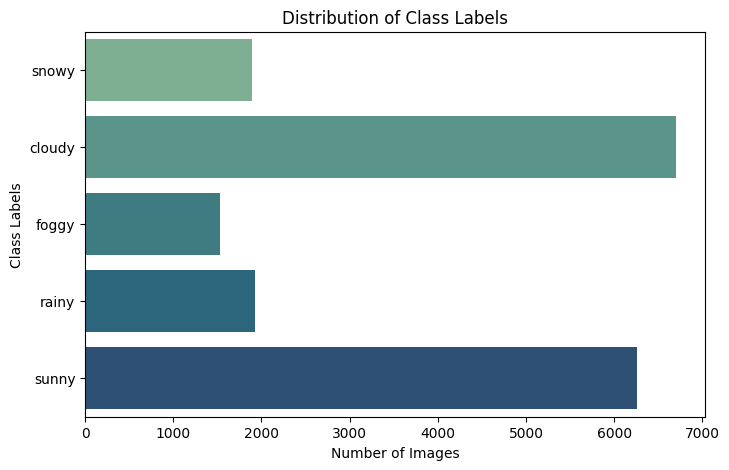

In [23]:
data = list(images_count_dict.items())
# Create a bar plot using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(y=[x[0] for x in data], x=[x[1] for x in data], palette='crest',orient='horizontal')
plt.ylabel('Class Labels')
plt.xlabel('Number of Images')
plt.title('Distribution of Class Labels')

# **Split Dataset**

In [24]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the dataset path and output paths
dataset_path = path  # Replace with the path to your dataset
output_path = "weather dataset"  # Replace with the path to save train/test folders

# Define train and test folder paths
train_path = os.path.join(output_path, "train")
test_path = os.path.join(output_path, "test")
val_path = os.path.join(output_path, "val")

# Create train and test directories
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# List of subfolders (sunny, cloudy, snowy, foggy, rainy)
subfolders = ['sunny', 'cloudy', 'snowy', 'foggy', 'rainy']

# Iterate over each subfolder
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.exists(subfolder_path):
        print(f"Subfolder {subfolder} does not exist in the dataset path.")
        continue

    # List all files in the current subfolder
    files = os.listdir(subfolder_path)

    # Split the files into train and test sets
    train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)
    train_files, val_files = train_test_split(train_files, test_size=0.2, random_state=42)

    # Create corresponding subfolders in train and test directories
    train_subfolder_path = os.path.join(train_path, subfolder)
    test_subfolder_path = os.path.join(test_path, subfolder)
    val_subfolder_path = os.path.join(val_path, subfolder)
    os.makedirs(train_subfolder_path, exist_ok=True)
    os.makedirs(test_subfolder_path, exist_ok=True)
    os.makedirs(val_subfolder_path, exist_ok=True)

    # Move files to the train subfolder
    for file in train_files:
        src = os.path.join(subfolder_path, file)
        dst = os.path.join(train_subfolder_path, file)
        shutil.copy(src, dst)

    # Move files to the test subfolder
    for file in test_files:
        src = os.path.join(subfolder_path, file)
        dst = os.path.join(test_subfolder_path, file)
        shutil.copy(src, dst)
         # Move files to the test subfolder
    for file in val_files:
        src = os.path.join(subfolder_path, file)
        dst = os.path.join(val_subfolder_path, file)
        shutil.copy(src, dst)

    print(f"Finished processing folder: {subfolder}")

print("Dataset has been split into train , test and validation folders.")


Finished processing folder: sunny
Finished processing folder: cloudy
Finished processing folder: snowy
Finished processing folder: foggy
Finished processing folder: rainy
Dataset has been split into train , test and validation folders.


In [25]:
train_path="/content/weather dataset/train"
test_path="/content/weather dataset/test"
val_path="/content/weather dataset/val"

In [26]:
os.listdir(test_path)

['snowy', 'cloudy', 'foggy', 'rainy', 'sunny']

In [27]:
train_folders = []
for class_folder in os.listdir(train_path):
    if not class_folder.__contains__("aug"):
        train_folders.append(class_folder)
print(train_folders)

['snowy', 'cloudy', 'foggy', 'rainy', 'sunny']


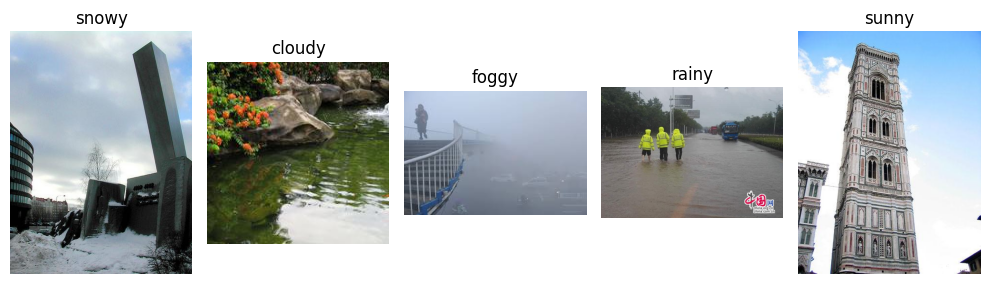

In [28]:
fig = plt.figure(figsize=(10,10))
rows = 1
columns = 5


for i, class_folder in enumerate(train_folders):

    first_img_path = os.listdir(os.path.join(train_path, class_folder))[0]
    first_image = imread(os.path.join(train_path, class_folder, first_img_path))
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.imshow(first_image)
    plt.title('{}'.format(class_folder, fontsize=10))

plt.tight_layout()
plt.show()

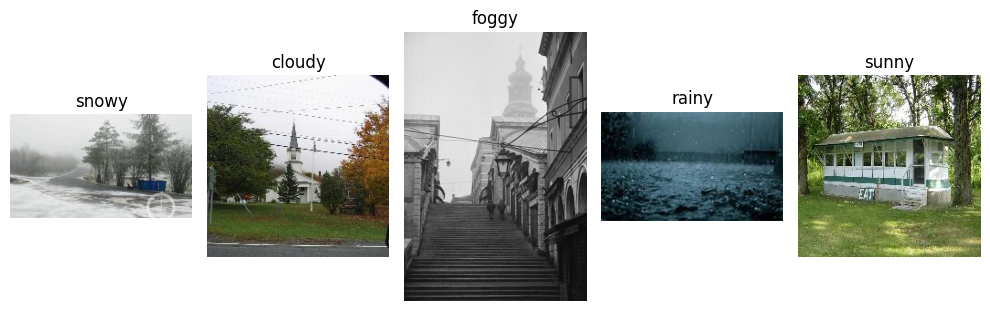

In [29]:
fig = plt.figure(figsize=(10,10))
rows = 1
columns = 5


for i, image_filename in enumerate(os.listdir(test_path)):

    first_img_path = os.listdir(os.path.join(test_path, image_filename))[0]
    first_image = imread(os.path.join(test_path, image_filename, first_img_path))
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.imshow(first_image)
    plt.title('{}'.format(image_filename, fontsize=10))

plt.tight_layout()
plt.show()

In [30]:
print("Test Dataset:")
all_data_sum=0
images_count_dict = {}
for class_folder in os.listdir(test_path):

    folder_path = os.path.join(test_path, class_folder)
    images_count = len(os.listdir(folder_path))
    images_count_dict[class_folder] = images_count
    all_data_sum+= images_count
    print('{} folder has {} images'.format(class_folder ,  images_count))

print("\nTotal Number of Images: {} image".format(all_data_sum))

Test Dataset:
snowy folder has 380 images
cloudy folder has 1340 images
foggy folder has 307 images
rainy folder has 387 images
sunny folder has 1253 images

Total Number of Images: 3667 image


<ipython-input-31-243f1f3da987>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=[x[0] for x in data], x=[x[1] for x in data], palette='crest',orient='horizontal')


Text(0.5, 1.0, 'Test Distribution of Class Labels')

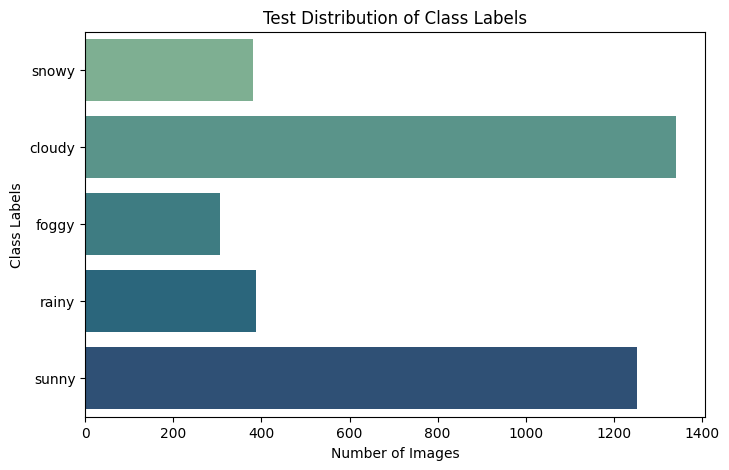

In [31]:
data = list(images_count_dict.items())

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(y=[x[0] for x in data], x=[x[1] for x in data], palette='crest',orient='horizontal')
plt.ylabel('Class Labels')
plt.xlabel('Number of Images')
plt.title('Test Distribution of Class Labels')

In [32]:
print("Train Dataset:")
all_data_sum=0
images_count_dict = {}
for class_folder in train_folders:

    folder_path = os.path.join(train_path, class_folder)
    images_count = len(os.listdir(folder_path))
    images_count_dict[class_folder] = images_count
    all_data_sum+= images_count
    print('{} folder has {} images'.format(class_folder ,  images_count))

print("\nTotal Number of Images: {} image".format(all_data_sum))

Train Dataset:
snowy folder has 1214 images
cloudy folder has 4286 images
foggy folder has 979 images
rainy folder has 1235 images
sunny folder has 4007 images

Total Number of Images: 11721 image


<ipython-input-33-e904185e3894>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=[x[0] for x in data], x=[x[1] for x in data], palette='crest',orient='horizontal')


Text(0.5, 1.0, 'Train Distribution of Class Labels')

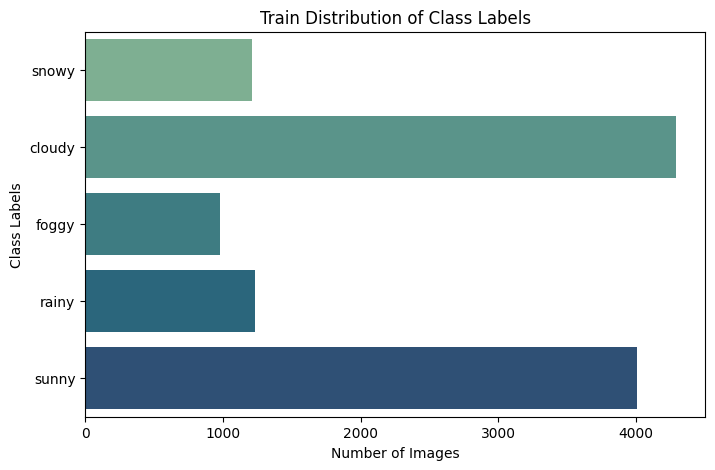

In [33]:
data = list(images_count_dict.items())

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(y=[x[0] for x in data], x=[x[1] for x in data], palette='crest',orient='horizontal')
plt.ylabel('Class Labels')
plt.xlabel('Number of Images')
plt.title('Train Distribution of Class Labels')

In [34]:
import pandas as pd
import os

# Function to create a DataFrame from a directory
def create_dataframe(directory):
    image_paths = []
    labels = []
    for class_folder in os.listdir(directory):
        class_path = os.path.join(directory, class_folder)
        for image_file in os.listdir(class_path):
            image_paths.append(os.path.join(class_path, image_file))
            labels.append(class_folder)
    return pd.DataFrame({'image': image_paths, 'label': labels})

# Create DataFrames for train, test, and validation sets
train_df = create_dataframe(train_path)
test_df = create_dataframe(test_path)
val_df = create_dataframe(val_path)


In [35]:
train_df.label.value_counts().to_frame()


,count
label,
cloudy,4286
sunny,4007
rainy,1235
snowy,1214
foggy,979


In [36]:
image_size = (256, 256)
batch_size = 32
epochs = 100
num_classes = 5
class_names = ['cloudy', 'foggy', 'rainy', 'snowy', 'sunny']


datagen = ImageDataGenerator(
    rescale=1./255
)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator= train_datagen.flow_from_dataframe(
    train_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical',
    #subset = 'training',
    color_mode='rgb',
    #classes=class_names
)
test_generator = datagen.flow_from_dataframe(
    test_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False,
    color_mode='rgb',
    class_mode='categorical',

)
val_generator = datagen.flow_from_dataframe(
    val_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical',
    #subset='validation',
    color_mode='rgb',
    #classes=class_names
)

Found 11720 validated image filenames belonging to 5 classes.
Found 3667 validated image filenames belonging to 5 classes.
Found 2932 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [37]:
class_ = test_generator.class_indices.keys()
class_ = list(class_)

# **DenseNet**

In [ ]:
# Load the DenseNet121 model pretrained on ImageNet
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to retain pretrained features
for layer in base_model.layers:
    layer.trainable = False


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(5, activation='softmax')(x)  # Output layer for 5 classes

# Combine base model and custom layers
model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])




In [ ]:
# Display the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_0_bn    

 Total params: 8,092,229 (30.87 MB)

 Trainable params: 1,054,725 (4.02 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
# Prepare the dataset - explicitly specify the classes to ensure consistency
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
# Define the classes you expect
classes = ['cloudy', 'foggy', 'rainy', 'snowy', 'sunny']

train_generator = train_datagen.flow_from_directory(
    '/content/weather dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=classes  # Specify classes here
)
val_generator = val_datagen.flow_from_directory(
    '/content/weather dataset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=classes  # Specify classes here
)
# Evaluate the model
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/weather dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # Important: keep data in same order for evaluation
    classes=classes
)

Found 11720 images belonging to 5 classes.
Found 2932 images belonging to 5 classes.
Found 3667 images belonging to 5 classes.


In [ ]:
# Train the model
history=model.fit(train_generator, validation_data=val_generator, epochs=35)

Epoch 1/35
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.7256 - loss: 0.6710

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


367/367 ━━━━━━━━━━━━━━━━━━━━ 176s 473ms/step - accuracy: 0.7256 - loss: 0.6709 - val_accuracy: 0.7439 - val_loss: 0.6083
Epoch 2/35
367/367 ━━━━━━━━━━━━━━━━━━━━ 153s 411ms/step - accuracy: 0.7726 - loss: 0.5648 - val_accuracy: 0.7814 - val_loss: 0.5558
Epoch 3/35
367/367 ━━━━━━━━━━━━━━━━━━━━ 154s 414ms/step - accuracy: 0.7896 - loss: 0.5298 - val_accuracy: 0.7776 - val_loss: 0.5476
Epoch 4/35
367/367 ━━━━━━━━━━━━━━━━━━━━ 156s 416ms/step - accuracy: 0.8047 - loss: 0.4946 - val_accuracy: 0.7674 - val_loss: 0.5579
Epoch 5/35
367/367 ━━━━━━━━━━━━━━━━━━━━ 201s 414ms/step - accuracy: 0.8024 - loss: 0.4907 - val_accuracy: 0.7909 - val_loss: 0.5259
Epoch 6/35
367/367 ━━━━━━━━━━━━━━━━━━━━ 202s 414ms/step - accuracy: 0.8230 - loss: 0.4557 - val_accuracy: 0.7851 - val_loss: 0.5960
Epoch 7/35
367/367 ━━━━━━━━━━━━━━━━━━━━ 205s 424ms/step - accuracy: 0.8262 - loss: 0.4234 - val_accuracy: 0.8073 - val_loss: 0.4926
Epoch 8/35
367/367 ━━━━━━━━━━━━━━━━━━━━ 199s 414ms/step - accuracy: 0.8418 - loss: 0.40

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

115/115 ━━━━━━━━━━━━━━━━━━━━ 22s 188ms/step - accuracy: 0.7721 - loss: 0.7434
Test Loss: 0.6244866251945496
Test Accuracy: 0.8151077032089233


In [ ]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8361 - loss: 0.5504
Validation Accuracy: 82.09%


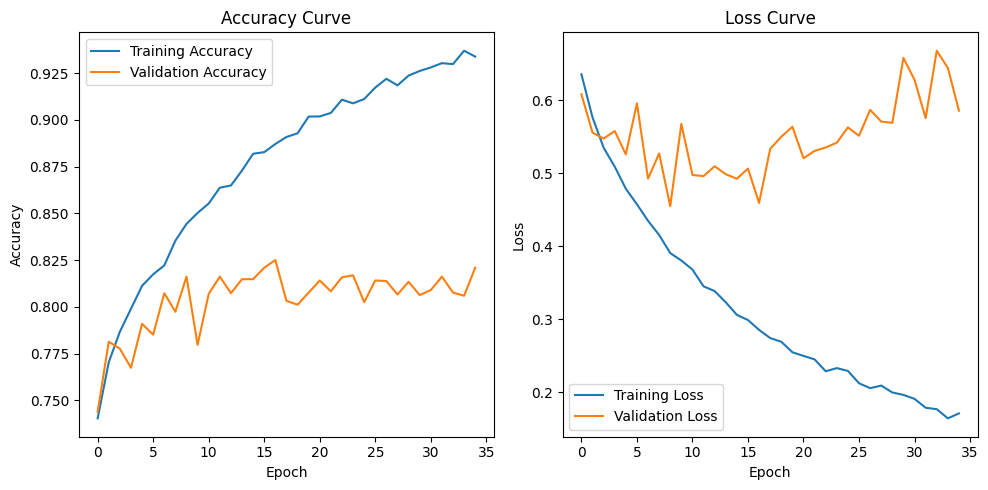

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.tight_layout()
plt.show()

115/115 ━━━━━━━━━━━━━━━━━━━━ 26s 151ms/step
              precision    recall  f1-score   support

      cloudy       0.81      0.78      0.80      1340
       foggy       0.94      0.82      0.88       307
       rainy       0.82      0.74      0.78       387
       snowy       0.79      0.83      0.81       380
       sunny       0.80      0.87      0.83      1253

    accuracy                           0.82      3667
   macro avg       0.83      0.81      0.82      3667
weighted avg       0.82      0.82      0.81      3667



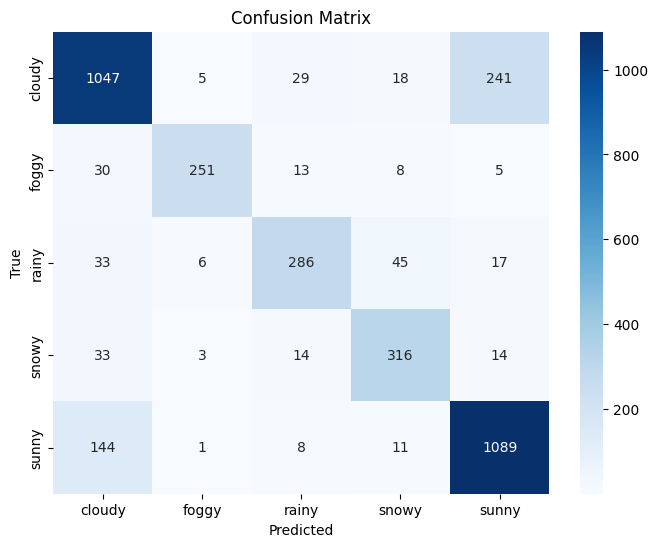

In [ ]:

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = test_generator.classes


# Generate and print classification report
print(classification_report(true_classes, predicted_classes, target_names=classes))

# Generate and plot confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

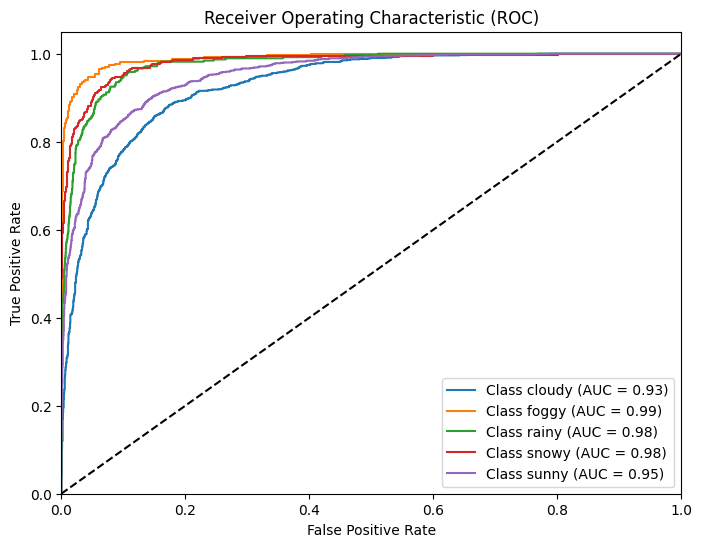

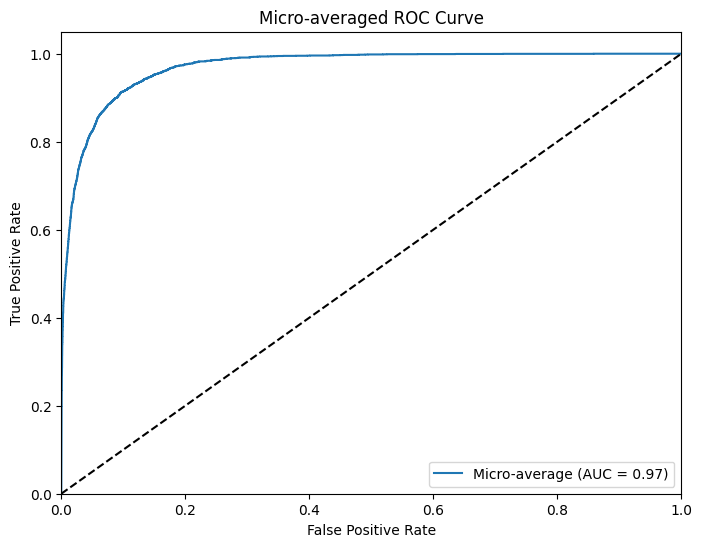

In [ ]:
# prompt: code for plot Roc and AUC

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming 'predictions' and 'true_classes' are already defined from the previous code

# Binarize the output
n_classes = 5  # Number of classes
y_test = label_binarize(true_classes, classes=range(n_classes))
y_score = predictions

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-averaged ROC Curve')
plt.legend(loc="lower right")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


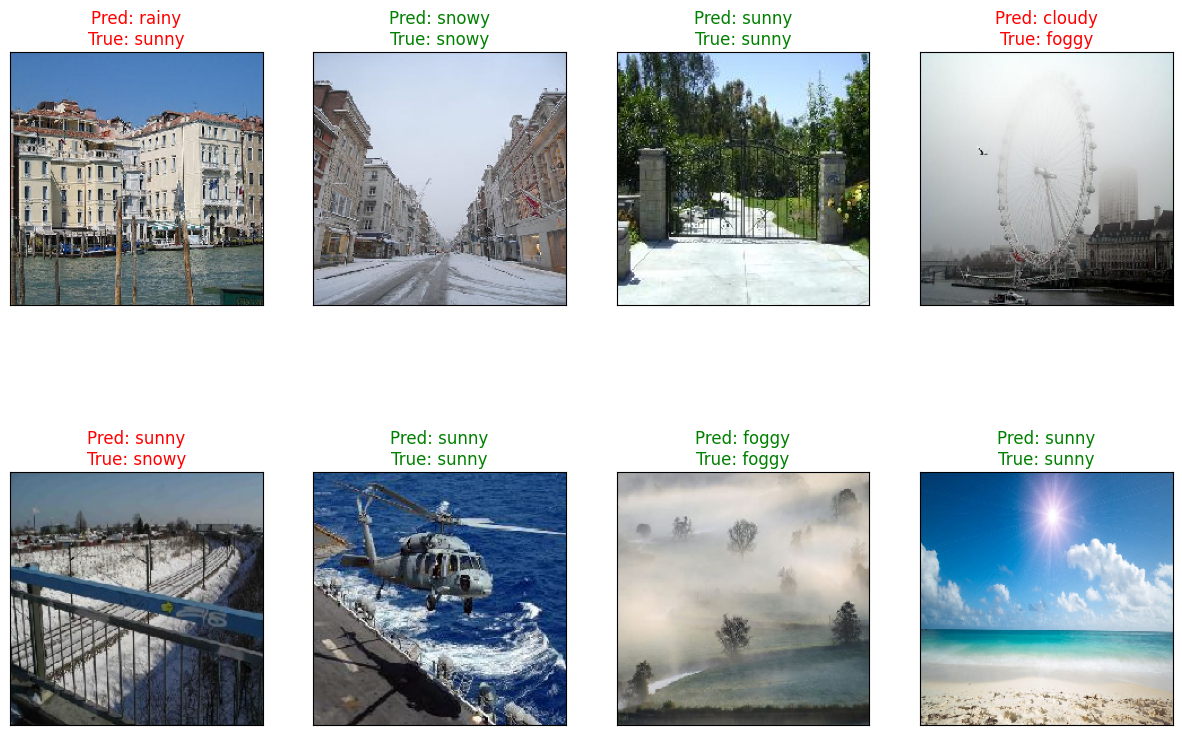

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to visualize predictions
def visualize_predictions(model, data_generator, class_names):
    inputs, labels = next(iter(data_generator))
    preds = model.predict(inputs)
    preds_classes = np.argmax(preds, axis=1)
    true_classes = np.argmax(labels, axis=1)

    # Plot images with predictions
    fig = plt.figure(figsize=(15, 10))
    for idx in range(8):  # Display 8 sample images
        ax = fig.add_subplot(2, 4, idx + 1, xticks=[], yticks=[])
        img = inputs[idx]
        plt.imshow(img)
        ax.set_title(f"Pred: {class_names[preds_classes[idx]]}\nTrue: {class_names[true_classes[idx]]}",
                     color=("green" if preds_classes[idx] == true_classes[idx] else "red"))

# Class names (e.g., rainy, foggy, etc.)
class_names = list(train_generator.class_indices.keys())
visualize_predictions(model, val_generator, class_names)

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Assuming the model and class names are defined
# from tensorflow.keras.models import load_model
# model = load_model('/content/drive/My Drive/densenet_weather.h5')
# class_names = ['cloudy', 'foggy', 'rainy', 'snowy', 'sunny']

# Function to predict the weather from an uploaded image
def predict_weather(image_path):
    try:
        img = load_img(image_path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)
        confidence = prediction[0][predicted_class] * 100
        weather_prediction = class_names[predicted_class]

        return weather_prediction, confidence

    except Exception as e:
        print(f"Error: {e}")
        return None, None

# Create upload button
upload_button = widgets.FileUpload(accept='image/*', multiple=False)

# Output widget to display results
output = widgets.Output()

# Function to handle image upload
def on_upload_change(change):
    with output:
        clear_output()
        uploaded_files = upload_button.value

        if uploaded_files:
            uploaded_file = list(uploaded_files.values())[0]
            image_path = "/content/uploaded_image.jpg"  # Temporary path for the image
            with open(image_path, "wb") as f:
                f.write(uploaded_file['content'])

            # Display the uploaded image
            plt.imshow(plt.imread(image_path))
            plt.axis('off')
            plt.title("Uploaded Image")
            plt.show()

            # Make prediction
            weather, confidence = predict_weather(image_path)

            if weather is not None:
                print(f"**Predicted Weather:** {weather}")
                print(f"**Confidence:** {confidence:.2f}%")
            else:
                print("Could not predict weather from the image.")

            # Remove temporary file
            os.remove(image_path)
        else:
            print("Please upload an image.")

# Attach upload event
upload_button.observe(on_upload_change, names='value')


# Display widgets
display(widgets.VBox([widgets.Label("Upload an image to predict the weather:"), upload_button, output]))


